In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [1]:
# Define the path to the CSV files
path_to_csvs = 'results/2020/real_time_adjustment/metrics'  # Update this with the actual path
output_csv = 'results/2020/real_time_adjustment/metrics/combined_metrics.csv'

# Get all CSV files in the directory that match the pattern
csv_files = glob.glob(os.path.join(path_to_csvs, 'metrics-HMIN*.csv'))

# Initialize an empty DataFrame to hold all the data
combined_df = pd.DataFrame()

# Loop through each file and read the data
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file,index_col=0)
    # Append the data to the combined DataFrame
    combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df = combined_df.sort_values(by=['H_MIN', 'Model','Adjustment Type'])
# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_csv, index=False)

print(f"Combined CSV saved to {output_csv}")


Combined CSV saved to combined_metrics.csv


In [2]:
# Open the combined CSV file and display the data
combined_df = pd.read_csv(output_csv)

display(combined_df)

,H_MIN,Model,Global Hindsight,Day-ahead Objective,Local Hindsight,Adjustment Type,Adjustment Value,MAO,RMAO
0,50,Deterministic,1.857385e+06,1.742988e+06,67772.396301,MPC,67626.378348,146.017954,0.002159
1,50,Deterministic,1.857385e+06,1.742988e+06,67772.396301,Rule-based,65362.328923,2410.067379,0.036872
2,50,HAPD-AF-12,1.857385e+06,1.787233e+06,30235.933528,MPC,30167.366963,68.566565,0.002273
3,50,HAPD-AF-12,1.857385e+06,1.787233e+06,30235.933528,Rule-based,28585.342467,1650.591060,0.057743
4,75,Deterministic,1.851653e+06,1.737412e+06,68493.826590,MPC,68122.426728,371.399863,0.005452
5,75,Deterministic,1.851653e+06,1.737412e+06,68493.826590,Rule-based,60886.034757,7607.791834,0.124951
6,75,HAPD-AF-12,1.851653e+06,1.777682e+06,33785.074167,MPC,33565.978071,219.096096,0.006527
7,75,HAPD-AF-12,1.851653e+06,1.777682e+06,33785.074167,Rule-based,30507.325837,3277.748330,0.107441
8,100,Deterministic,1.836496e+06,1.723099e+06,67379.202244,MPC,66728.122588,651.079657,0.009757
9,100,Deterministic,1.836496e+06,1.723099e+06,67379.202244,Rule-based,57312.475303,10066.726941,0.175646


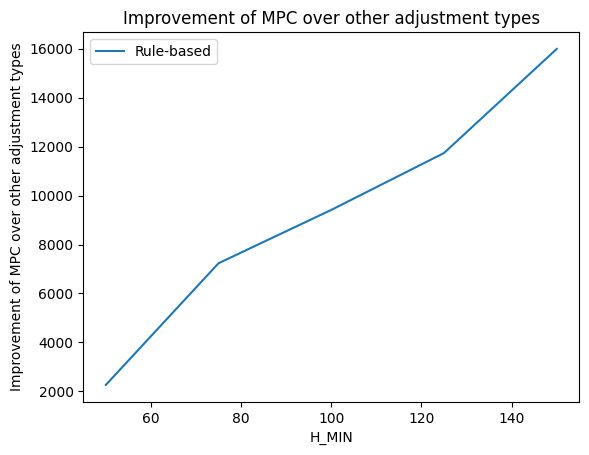

In [19]:
def compute_MPC_improvement(df):
    # Computes for each h_min value the difference between the adjustment value of MPC and the adjustment value of the other adjustment types
    models = df['Model'].unique()
    adjustment_types = df['Adjustment Type'].unique()
    adjustment_types = [adj_type for adj_type in adjustment_types if adj_type != 'MPC']
    
    h_mins = df['H_MIN'].unique()
    total_results = {}
    for adj_type in adjustment_types:
        results = {}
        for h_min in h_mins:
            mpc_value = df[(df['H_MIN'] == h_min) & (df['Adjustment Type'] == 'MPC')]['Adjustment Value'].values[0]
            for model in models:
                if adj_type == 'MPC':
                    continue
                adj_value = df[(df['H_MIN'] == h_min) & (df['Adjustment Type'] == adj_type)]['Adjustment Value'].values[0]
                improvement = mpc_value - adj_value
                results[h_min] = improvement
        # Plot the improvement of MPC over the other adjustment types
        plt.plot(results.keys(), results.values(), label=adj_type)
        plt.xlabel("H_MIN")
        plt.ylabel("Improvement of MPC over other adjustment types")
        plt.title("Improvement of MPC over other adjustment types")
        plt.legend()
        plt.show()
        total_results[adj_type] = results
    
    return total_results

# Compute the improvement of MPC over other adjustment types
mpc_improvement = compute_MPC_improvement(combined_df)

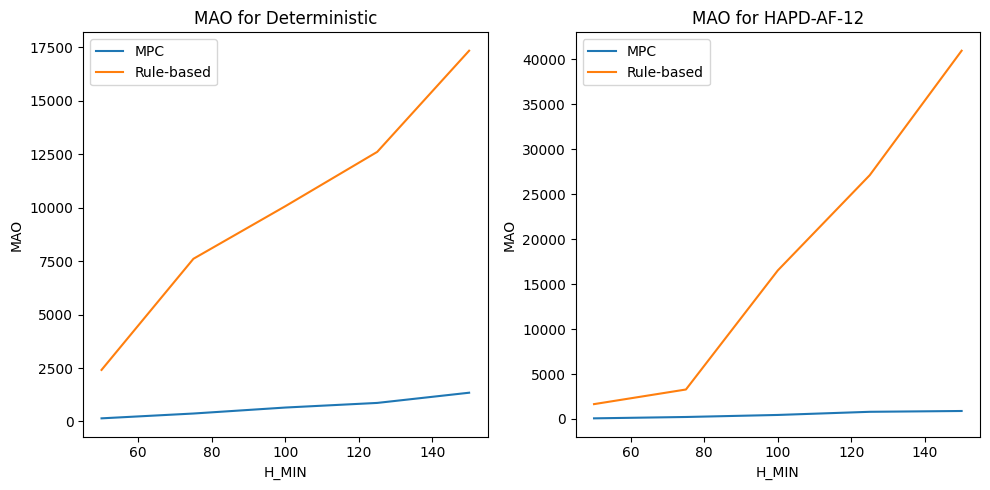

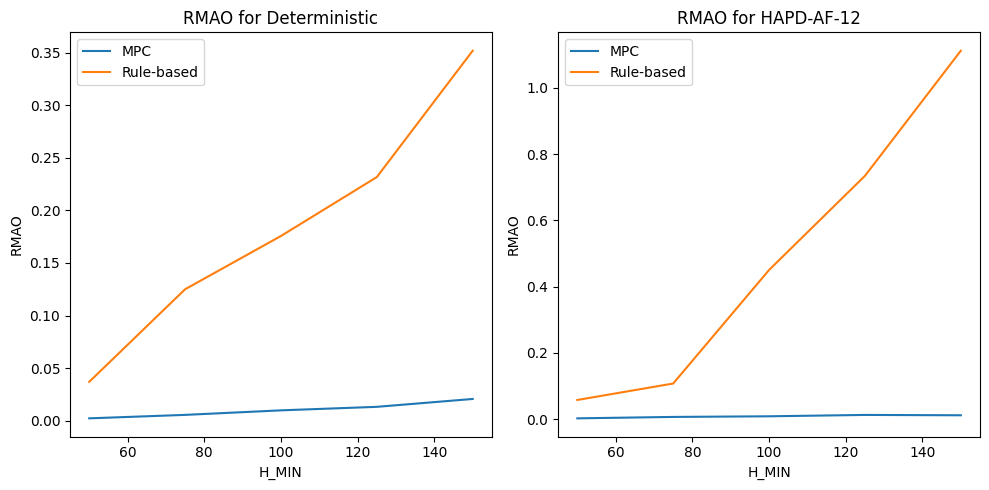

In [20]:
# Get a list of unique models
models = combined_df['Model'].unique()

# Get a list of unique metrics
metrics = ['MAO','RMAO']

def plot_metrics(df):
    # Plot each metric as a function of H_MIN for each adjustment type and model
    for metric in metrics:
        fig, ax = plt.subplots(1, len(models), figsize=(10, 5))
        for i, model in enumerate(models):
            for adj_type in combined_df['Adjustment Type'].unique():
                df = df[(df['Model'] == model) & (combined_df['Adjustment Type'] == adj_type)]
                ax[i].plot(df['H_MIN'], df[metric], label=adj_type)
                ax[i].set_title(f"{metric} for {model}")
                ax[i].set_xlabel("H_MIN")
                ax[i].set_ylabel(metric)
                ax[i].legend()
        plt.tight_layout()
        plt.show()